In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pwd

'/home/test/c/Springboard/hand-gestures'

In [4]:
train_dir = './train'
train_d = './train/D'
train_y = './train/Y'
test_dir = './test'
test_d = './test/D'
test_y = './test/Y'

In [5]:
num_d_tr = len(os.listdir(train_d))
num_y_tr = len(os.listdir(train_y))

num_d_test = len(os.listdir(test_d))
num_y_test = len(os.listdir(test_y))

total_train = num_d_tr + num_y_tr
total_val = num_d_test + num_y_test

In [6]:
print('training "D" images:', num_d_tr)
print('training "Y" images:', num_y_tr)

print('test "D" images:', num_d_test)
print('test "Y" images:', num_y_test)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

training "D" images: 132
training "Y" images: 236
test "D" images: 10
test "Y" images: 10
--
Total training images: 368
Total validation images: 20


In [7]:
batch_size = 16
epochs = 15
#IMG_HEIGHT = 1088
#IMG_WIDTH = 1920
IMG_HEIGHT = 255 # will rescale all jpeg images to 255x255
IMG_WIDTH = 255

In [8]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
test_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our test data

In [9]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 368 images belonging to 2 classes.


In [10]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                         directory=test_dir,
                                                         target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                         class_mode='binary')

Found 20 images belonging to 2 classes.


In [11]:
sample_training_images, _ = next(train_data_gen)

In [12]:
# This function will plot images in the form of a grid with 1 row and 5 columns 
# where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

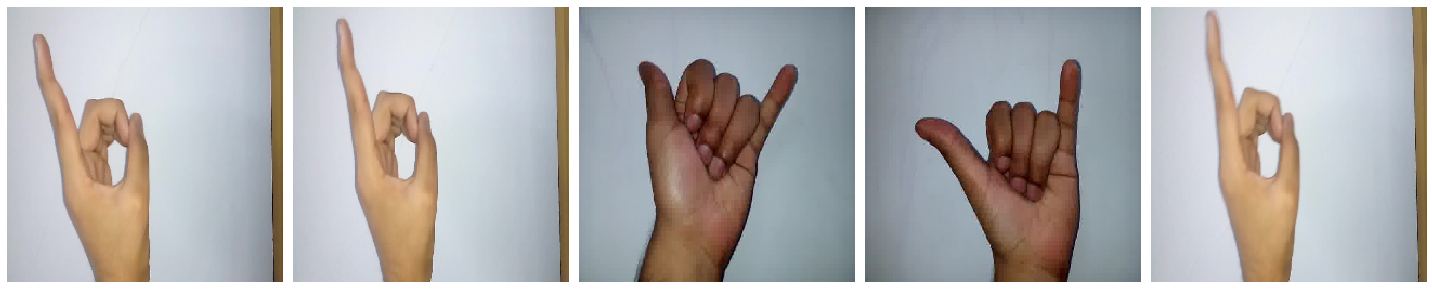

In [13]:
plotImages(sample_training_images[:5])

In [14]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 255, 255, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 127, 127, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 61504)             0

In [17]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
23/23 [==============================] - 57s 2s/step - loss: 1.3215 - accuracy: 0.5652 - val_loss: 0.3254 - val_accuracy: 1.0000
Epoch 2/15
23/23 [==============================] - 55s 2s/step - loss: 0.0542 - accuracy: 1.0000 - val_loss: 2.0108e-04 - val_accuracy: 1.0000
Epoch 3/15
23/23 [==============================] - 55s 2s/step - loss: 4.8530e-05 - accuracy: 1.0000 - val_loss: 2.3728e-05 - val_accuracy: 1.0000
Epoch 4/15
23/23 [==============================] - 55s 2s/step - loss: 9.7854e-06 - accuracy: 1.0000 - val_loss: 6.0886e-06 - val_accuracy: 1.0000
Epoch 5/15
23/23 [==============================] - 54s 2s/step - loss: 7.2426e-06 - accuracy: 1.0000 - val_loss: 5.6015e-06 - val_accuracy: 1.0000
Epoch 6/15
23/23 [==============================] - 54s 2s/step - loss: 5.9104e-06 - accuracy: 1.0000 - val_loss: 5.5233e-06 - val_accuracy: 1.0000
Epoch 7/15
23/23 [==============================] - 54s 2s/step - loss: 5.5458e-06 - accuracy: 1.0000 - val_loss: 4.6850e-06

In [1]:
# https://www.tensorflow.org/tutorials/images/classification

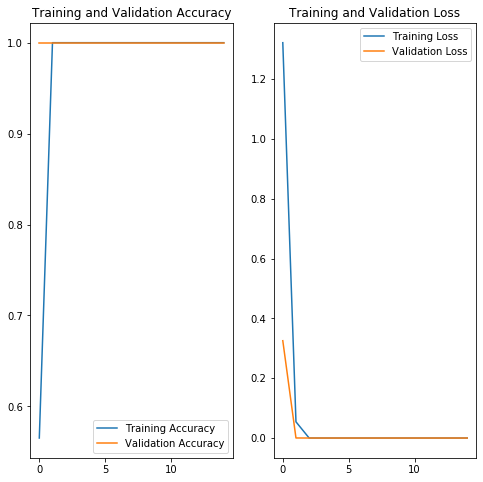

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
type(history)

tensorflow.python.keras.callbacks.History

In [22]:
history.params

{'batch_size': None,
 'epochs': 15,
 'steps': 23,
 'samples': 23,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}